In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r'C:\Users\Satyam\Downloads\Country-data.csv')

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

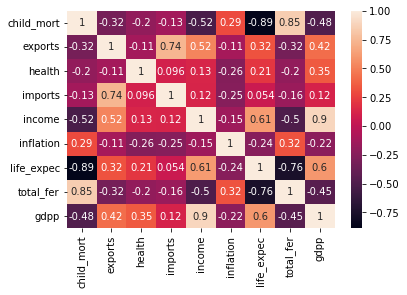

In [7]:
sns.heatmap(df.corr(),annot = True)

In [8]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(df.drop('country',axis = 1))

In [11]:
scaled_df = pd.DataFrame(data = scaled_data,columns=df.columns[1:])

In [12]:
scaled_df['country'] = df['country']

In [13]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,Vanuatu
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,Venezuela
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,Vietnam
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,Yemen


<BarContainer object of 167 artists>

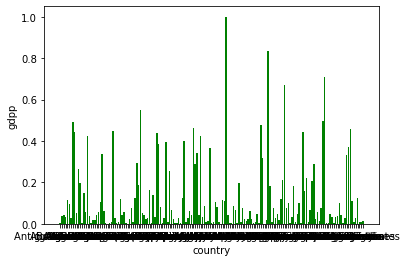

In [14]:
plt.xlabel('country')
plt.ylabel('gdpp')
plt.bar(scaled_df['country'],scaled_df['gdpp'],color='g')

In [15]:
data = scaled_df.drop('country',axis = 1)

In [16]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [20]:
# wss
# choose the value of k
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters= k)
    km = km.fit(data)
    ssd.append(km.inertia_)

C:\Users\Satyam\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

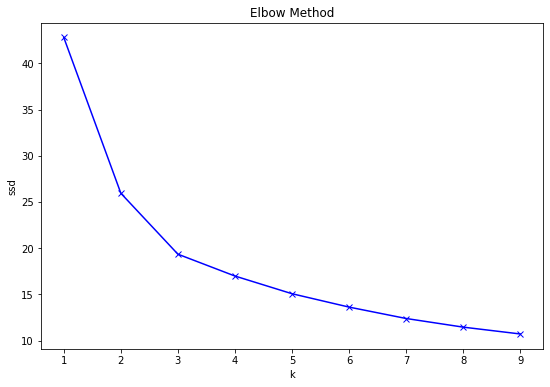

In [22]:
plt.figure(figsize=(9,6))
plt.plot(K,ssd,'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title("Elbow Method")


In [23]:
kmean = KMeans(n_clusters=3)

In [24]:
kmean.fit(data)

KMeans(n_clusters=3)

In [25]:
pred = kmean.labels_

In [26]:
print(pred)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 1 0 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [27]:
# make scatter plot for this.
# x = gdpp
# y = income

from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
pca_model = pca.fit_transform(data)

In [30]:
data_transform = pd.DataFrame(data=pca_model,columns=['PCA1','PCA2'])

In [32]:
data_transform['Cluster'] = pred

In [34]:
data_transform

,PCA1,PCA2,Cluster
0,-0.599078,0.095490,1
1,0.158474,-0.212092,0
2,0.003686,-0.135867,0
3,-0.650235,0.275975,1
4,0.200711,-0.064662,0
...,...,...,...
162,-0.160078,-0.029625,0
163,0.061133,-0.171339,0
164,0.115512,-0.032034,0
165,-0.332968,-0.019824,1
